In [1]:
from sklearn.cluster import KMeans
import numpy as np

import os

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Dense, concatenate, Dropout
from keras.optimizers import SGD, Adam

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import uproot

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
def  get_input_arrays(tree, features_list):
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    print(array.shape)
    print(array[0])
    return array

In [5]:
dataDir = '../data/'

In [8]:
tree = uproot.open(dataDir + 'samples_AB21279_com_03_mc16e-test_01-tester_02.root')[b'features']

In [35]:
#tree.keys()

In [9]:
spin_list = [b'c_nn', b'NW_c_nn', b'SN_c_nn', b'EM_c_nn']

In [10]:
c_nn    = get_input_arrays(tree, [b'c_nn'])
NW_c_nn = get_input_arrays(tree, [b'NW_c_nn'])
SN_c_nn = get_input_arrays(tree, [b'SN_c_nn'])
EM_c_nn = get_input_arrays(tree, [b'EM_c_nn'])

(495193, 1)
[0.14725683]
(495193, 1)
[-0.06041316]
(495193, 1)
[0.19637061]
(495193, 1)
[0.1963706]


In [13]:
NW_array = get_input_arrays(tree, [
    b'NW_top_pt',
    b'NW_top_eta',
    b'NW_top_phi',
    b'NW_tbar_pt',
    b'NW_tbar_eta',
    b'NW_tbar_phi',
    #b'NW_top_m',
    #b'NW_tbar_m',
    b'NW_nu_pt',
    b'NW_nu_eta',
    b'NW_nu_phi',
    b'NW_nubar_pt',
    b'NW_nubar_eta',
    b'NW_nubar_phi',
    #b'NW_top_delta_phi',
    #b'NW_top_delta_eta',
    #b'NW_b_delta_phi',
    #b'NW_b_delta_eta'
])

(495193, 12)
[ 3.29981018e+02 -1.04905975e+00 -2.19833159e+00  7.58894653e+01
 -8.31805766e-01  1.53023696e+00  1.29770401e+02 -1.09161079e+00
 -1.71122825e+00  4.77247429e+01  1.90713078e-01 -3.04522586e+00]


In [14]:
SN_array = get_input_arrays(tree, [
    b'SN_top_pt',
    b'SN_top_eta',
    b'SN_top_phi',
    b'SN_tbar_pt',
    b'SN_tbar_eta',
    b'SN_tbar_phi',
    b'SN_nu_pt',
    b'SN_nu_eta',
    b'SN_nu_phi',
    b'SN_nubar_pt',
    b'SN_nubar_eta',
    b'SN_nubar_phi',
])

(495193, 12)
[ 2.21662628e+02 -1.21580446e+00 -2.45971704e+00  2.31740738e+02
 -3.29795182e-01  6.68151915e-01  3.65213227e+00 -3.99573636e+00
 -3.01279306e-01  1.45723938e+02  1.37088448e-02  4.48231936e-01]


In [15]:
EM_array = get_input_arrays(tree, [
    b'EM_top_pt',
    b'EM_top_eta',
    b'EM_top_phi',
    b'EM_tbar_pt',
    b'EM_tbar_eta',
    b'EM_tbar_phi',
    b'EM_nu_pt',
    b'EM_nu_eta',
    b'EM_nu_phi',
    b'EM_nubar_pt',
    b'EM_nubar_eta',
    b'EM_nubar_phi',
])

(495193, 12)
[ 2.21662613e+02 -1.21580446e+00 -2.45971704e+00  2.31740738e+02
 -3.29795182e-01  6.68151855e-01  3.65213394e+00 -3.99573588e+00
 -3.01277667e-01  1.45723938e+02  1.37088653e-02  4.48231906e-01]


In [42]:
#label = np.zeros((1,3), dtype=int)
#labels = []
#for i in range(20):
#    labels.append(label)
#labels = np.asarray(labels)
#labels

In [121]:
def make_labels(true_vals, NW_vals, SN_vals, EM_vals):
    
    #label = np.zeros((1,3), dtype=int)
    labels = []
    #for i in range(len(true_vals)):
    #    labels.append(label)
    #labels = np.asarray(labels)
    #print(labels)
    
    NW_diffs = np.abs(NW_vals - true_vals)
    SN_diffs = np.abs(SN_vals - true_vals)
    EM_diffs = np.abs(EM_vals - true_vals)
   
    #print("NW_diffs:", NW_diffs)
    #print(NW_diffs.argmin())
    #print("SN_diffs:", SN_diffs)
    #print(SN_diffs.argmin())
    #print("EM_diffs:", EM_diffs)
    #print(EM_diffs.argmin())
    diffs = np.array([NW_diffs, SN_diffs, EM_diffs])
    for i in range(len(true_vals)):
        if np.array([NW_diffs[i], SN_diffs[i], EM_diffs[i]]).argmin() == 0:
            labels.append(np.array([1,0,0],dtype=int))
        elif np.array([NW_diffs[i], SN_diffs[i], EM_diffs[i]]).argmin() == 1:
            labels.append(np.array([0,1,0],dtype=int))
        else: # np.array([NW_diffs[i], SN_diffs[i], EM_diffs[i]]).argmin() == 2:
            labels.append(np.array([0,0,1],dtype=int))
    labels = np.asarray(labels)
    return labels
    #print(labels)

In [143]:
#toy data for testing def
#toy_NW = np.array([0.22, 0.39, 0.99, -0.4])
#toy_SN = np.array([0.21, 0.23, 0.88, -0.2])
#toy_EM = np.array([0.23, 0.33, 0.82, -0.3])
#toy_tr = np.array([0.25, 0.39, 0.81, -0.1])
#labels = make_labels(toy_tr, toy_NW, toy_SN, toy_EM)
#print(labels)

In [147]:
labels = make_labels(c_nn, NW_c_nn, SN_c_nn, EM_c_nn)
for i in range(10):
    print(labels[i])

[0 0 1]
[0 1 0]
[1 0 0]
[0 0 1]
[0 1 0]
[0 1 0]
[0 1 0]
[0 1 0]
[0 1 0]
[1 0 0]


In [148]:
data = get_input_arrays(tree, [
    # MET
    b'reco_met',
    b'reco_met_phi',
    # +ve LEPTON
    b'reco_lep_p_pt',
    b'reco_lep_p_eta',
    b'reco_lep_p_phi',
    b'reco_lep_p_e',
    # -ve LEPTON
    b'reco_lep_n_pt',
    b'reco_lep_n_eta',
    b'reco_lep_n_phi',
    b'reco_lep_n_e',
    # Jets (pT ordered)
    b'reco_jet_0_pt',
    b'reco_jet_0_eta',
    b'reco_jet_0_phi',
    b'reco_jet_0_e',
    b'reco_jet_0_e',
    b'reco_jet_1_pt',
    b'reco_jet_1_eta',
    b'reco_jet_1_phi',
    b'reco_jet_1_e',
    b'reco_jet_2_pt',
    b'reco_jet_2_eta',
    b'reco_jet_2_phi',
    b'reco_jet_2_e',
    #b'reco_njets',
    #b'reco_lep_delta_phi',
    #b'reco_lep_delta_eta',
])

(495193, 23)
[ 1.48418243e+02  4.31466848e-01  1.12310402e+02 -1.24834192e+00
 -2.37119079e+00  2.11791626e+02  5.36234741e+01  1.11985207e-01
  1.42690647e+00  5.39601669e+01  1.12566338e+02 -5.27519703e-01
 -2.57518482e+00  1.29047836e+02  1.29047836e+02  5.08690796e+01
 -1.29440272e+00  5.67646205e-01  9.99037247e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [127]:
#data  = NW_array

#labels  = np.concatenate((np.ones(10000),np.zeros(10000)))

data = shuffle(data)
labels = shuffle(labels)
#x_train  = spin_array

In [128]:
x_train, x_test, y_train, y_test = train_test_split(data, labels)

In [129]:
transformer = RobustScaler()
x_train_scaled = transformer.fit_transform(x_train)
print(x_train_scaled.shape)

(371394, 23)


In [130]:
def model_D(input_n):
    # Discriminant
    D_input = Input(shape=(input_n,), name="dnn_input")

    x = Dense(256, activation="relu")(D_input)
    x = Dropout(0.2)(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(3, activation="softmax")(x)
    return Model(D_input, x)

In [132]:
D = model_D(x_train.shape[1])
D_sgd = SGD(lr=0.01, decay=1e-8, momentum=0.0, nesterov=False)
#D.compile(optimizer="adam", loss="binary_crossentropy")
D.compile(optimizer=D_sgd, loss="categorical_crossentropy", metrics=["accuracy"])

In [133]:
D.fit(x_train_scaled,y_train,epochs=15)


Epoch 1/15
371394/371394 [==============================] - 26s 70us/step - loss: 0.9075 - accuracy: 0.5794
Epoch 2/15
371394/371394 [==============================] - 26s 71us/step - loss: 0.9037 - accuracy: 0.5801
Epoch 3/15
371394/371394 [==============================] - 27s 73us/step - loss: 0.9034 - accuracy: 0.5801
Epoch 4/15
371394/371394 [==============================] - 27s 72us/step - loss: 0.9033 - accuracy: 0.5801
Epoch 5/15
371394/371394 [==============================] - 27s 74us/step - loss: 0.9032 - accuracy: 0.5801
Epoch 6/15
371394/371394 [==============================] - 27s 73us/step - loss: 0.9031 - accuracy: 0.5801
Epoch 7/15
371394/371394 [==============================] - 27s 73us/step - loss: 0.9031 - accuracy: 0.5801
Epoch 8/15
371394/371394 [==============================] - 27s 74us/step - loss: 0.9032 - accuracy: 0.5801
Epoch 9/15
371394/371394 [==============================] - 28s 74us/step - loss: 0.9031 - accuracy: 0.5801
Epoch 10/15
371394/371394 [

In [139]:
x_test_scaled = transformer.transform(x_test)
print(x_test.shape)

(123799, 23)


In [151]:
y_pred = D.predict(x_test)
print(y_pred.shape)
for i in range(1):
    print(y_pred)

(123799, 3)
[[0.01221601 0.05087937 0.9369046 ]
 [0.19797584 0.4964409  0.30558327]
 [0.10165878 0.38478017 0.513561  ]
 ...
 [0.24148987 0.5015259  0.2569842 ]
 [0.21724387 0.40768895 0.3750671 ]
 [0.18281549 0.25323823 0.56394625]]


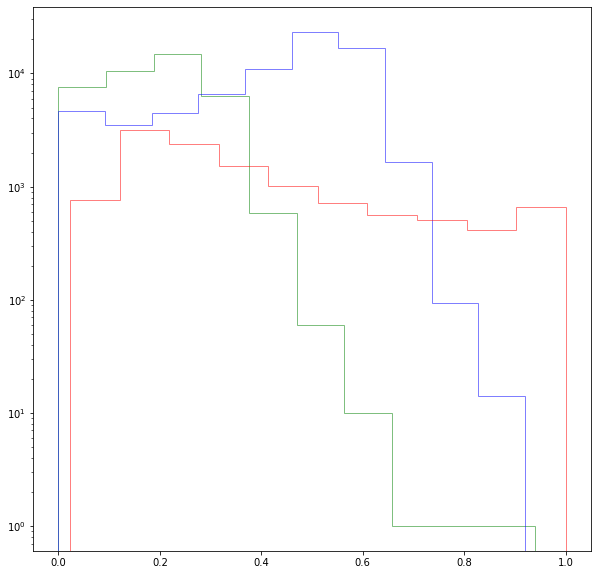

In [162]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_yscale('log')
_=plt.hist(y_pred[np.where(y_test[:,0]==1)[0],0],bins=10,alpha=0.5,histtype='step', color='green')
_=plt.hist(y_pred[np.where(y_test[:,1]==1)[0],1],bins=10,alpha=0.5,histtype='step', color='blue')
_=plt.hist(y_pred[np.where(y_test[:,2]==1)[0],2],bins=10,alpha=0.5,histtype='step', color='red')
#_=plt.hist(y_pred[np.where(y_test[:,0]==1)[0],0],bins=10,alpha=0.5,histtype='step',color=['blue','green','red'])
#_=plt.hist(y_pred[np.where(y_test == [1,0,0])[0]],bins=10,alpha=0.5,histtype='step',color='blue')
#_=plt.hist(y_pred[np.where(y_test == [0,1,0])[0]],bins=10,alpha=0.5,histtype='step',color='red')
#_=plt.hist(y_pred[np.where(y_test == [0,0,1])[0]],bins=10,alpha=0.5,histtype='step',color='green')